# 2D Classification with a Two-Layer Neural Network

We'll implement a script to classify 2D data using a two-layer neural network.

## Load Data

We'll load the data using the function `load_data()` from `loader.py`.

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_class_2d_convex_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[-1.85714572e+00  8.84031190e-01]
 [ 1.28168793e+00 -6.16053092e-01]
 [-7.63875577e-01 -9.78911810e-01]
 [-2.82886194e-02 -3.70336627e-01]
 [ 1.01915959e+00  6.10208214e-01]
 [ 6.05633497e-01 -4.10462939e-02]
 [-1.66662442e+00 -6.03260213e-01]
 [-7.52577177e-02  1.22559116e-02]
 [ 2.45299809e+00  1.98951164e+00]
 [-1.23166237e-01  3.46114322e-01]
 [-2.88889017e-01 -8.61139813e-01]
 [-2.35671166e+00  3.19917360e-01]
 [-6.62043487e-01  1.16967457e+00]
 [-1.21989583e+00 -7.27511157e-01]
 [ 1.11830794e+00 -5.60733389e-01]
 [ 1.17966167e+00  5.86114530e-01]
 [ 1.39624509e+00  3.93363154e-01]
 [-2.15423298e-01  3.68900432e-01]
 [ 1.29689380e+00 -1.06305978e+00]
 [-3.46881498e-01  1.52964546e-01]
 [ 6.94857156e-01  6.20697924e-01]
 [-1.43270884e+00  2.01623242e-01]
 [-1.85210133e+00  6.25857537e-01]
 [-1.13473583e+00 -3.64487543e-01]
 [ 6.19234929e-01 -8.09500293e-01]
 [ 5.21638769e-01 -3.48472092e-01]
 [-5.87454459e-01 -8.26845039e-01]
 [ 2.93064627e-01  7.90335832e-01]
 [ 1.38560440e+00

## Visualize Data

We'll than visualize these data using the function `plot_data_2d()` from `plotting.py`.

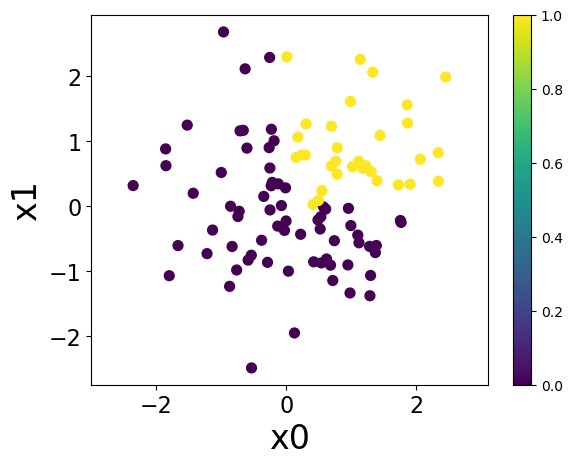

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Two-Layer Neural Network

We now create the two-layer neural network with 3 neurons (`num_neuron = 3`) in the first layer and a single neuron in the output layer ...

In [4]:
def sigmoid(x):
    from numpy import exp
    return 1 / (1 + exp(-x))

def dnn2_clas(wa, wb, x):
    return sigmoid(sigmoid(x @ wa) @ wb)

num_neurons = 3

... randomly initialize its weights ...

In [5]:
from numpy.random import default_rng

rng = default_rng()
wa = rng.standard_normal(size=(2, num_neurons)) # input weights layer 1
wb = rng.standard_normal(size=(num_neurons, 1)) # input weights layer 2 (output)

... and obtain its predictions for the input data.

In [7]:
y_p = dnn2_clas(wa, wb, x)

**Note**

The calculation of neural network prediction can be made more explicit indicating all intermediate results (which are needed for the error back-propagation):

```python
def dnn2_clas(wa, wb, x):
    x_a = x # input layer 1
    p_a = x_a @ wa # activation potential layer 1
    y_a = sigmoid(p_a) # output layer 1
    
    x_b = y_a # input layer 2
    p_b = x_b @ wb # activation potential layer 2
    y_b = sigmoid(p_b) # output layer 2 (output neuron)
    
    return y_b
```

## Visualize Predictions by Randomly Initialized Neural Network

We now plot its predictions using the function `plot_pred_2d` from `plotting.py`.

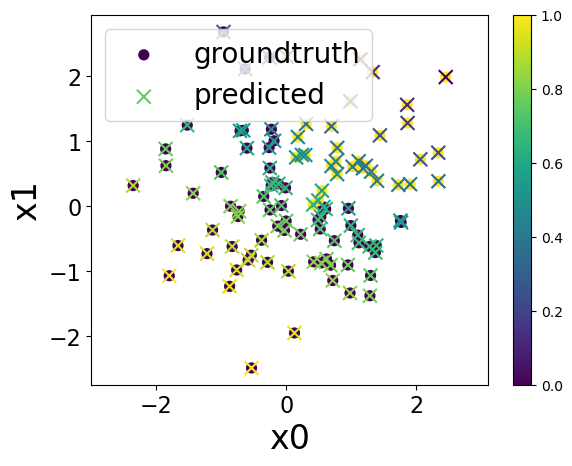

In [9]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p)

## Training

We now train the neural network using the error back-propagation algorithm ...

In [12]:
from numpy import reshape, transpose, sum

num_samples = len(x)
num_train_iterations = 10**5
eta = .1 # learning rate

def d_sigmoid(x):
       return sigmoid(x) * (1 - sigmoid(x))

for i in range(num_train_iterations):
    # select random sample
    selected = rng.integers(0, num_samples)
    x_selected = reshape(x[selected], (1, -1))
    y_gt_selected = reshape(y_gt[selected], (1, -1))
    
    # detailed neural network calculation
    x_selected_a = x_selected # input layer 1
    p_a = x_selected_a @ wa # activation potential layer 1 
    y_selected_a = sigmoid(p_a) # output layer 1

    x_selected_b = y_selected_a # input layer 2
    p_b = x_selected_b @ wb # activation potential layer 2
    y_selected_b = sigmoid(p_b) # output layer 2 (output neuron) 
    
    y_p_selected = y_selected_b

    # update weights
    error = y_p_selected - y_gt_selected

    delta_b = error * d_sigmoid(p_b)
    wb -= eta * delta_b * transpose(x_selected_b)

    delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
    wa -= eta * delta_a * transpose(x_selected_a)

    if i%100 == 0:
        print(f"{i} y_p={y_p_selected[0, 0]:.2f} error = {error[0, 0]:.2f}")

0 y_p=0.00 error = 0.00
100 y_p=0.03 error = 0.03
200 y_p=0.00 error = 0.00
300 y_p=0.00 error = 0.00
400 y_p=0.01 error = 0.01
500 y_p=0.00 error = 0.00
600 y_p=0.00 error = 0.00
700 y_p=0.02 error = 0.02
800 y_p=0.06 error = 0.06
900 y_p=0.00 error = 0.00
1000 y_p=0.00 error = 0.00
1100 y_p=0.94 error = -0.06
1200 y_p=0.00 error = 0.00
1300 y_p=0.99 error = -0.01
1400 y_p=0.00 error = 0.00
1500 y_p=0.01 error = 0.01
1600 y_p=0.00 error = 0.00
1700 y_p=1.00 error = -0.00
1800 y_p=0.98 error = -0.02
1900 y_p=0.00 error = 0.00
2000 y_p=1.00 error = -0.00
2100 y_p=0.05 error = 0.05
2200 y_p=0.00 error = 0.00
2300 y_p=1.00 error = -0.00
2400 y_p=1.00 error = -0.00
2500 y_p=0.97 error = -0.03
2600 y_p=0.01 error = 0.01
2700 y_p=0.01 error = 0.01
2800 y_p=1.00 error = -0.00
2900 y_p=0.90 error = -0.10
3000 y_p=0.00 error = 0.00
3100 y_p=0.02 error = 0.02
3200 y_p=0.00 error = 0.00
3300 y_p=1.00 error = -0.00
3400 y_p=0.01 error = 0.01
3500 y_p=0.99 error = -0.01
3600 y_p=0.98 error = -0.02


... and plot its performance, again using the function `plot_pred_2d` from `plotting.py`.

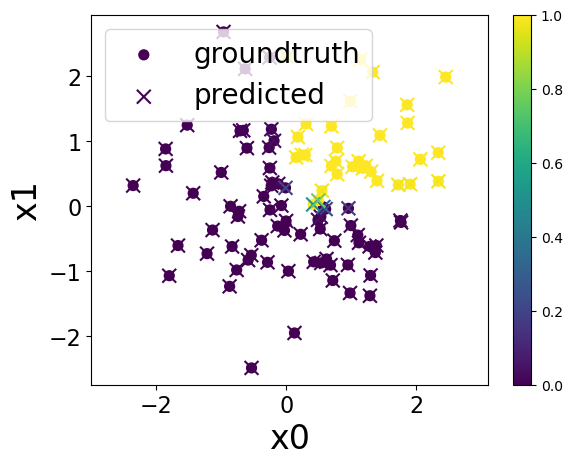

In [13]:
plot_pred_2d(x, y_gt, y_p=dnn2_clas(wa, wb, x))

## Testing

We now check how the trained neuron works on the test data.

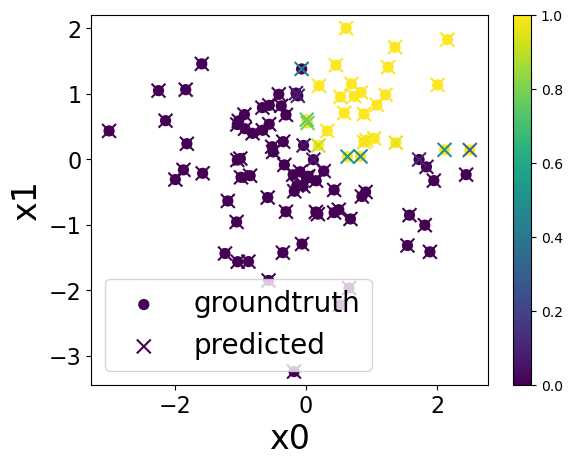

In [15]:
(x_test, y_gt_test) = load_data(filename="data_class_2d_convex_clean_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=dnn2_clas(wa, wb, x_test))